In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


<ipython-input-1-2ce0d24443bf>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [14]:
nperclust = 100
blur =  1
A = [1,1]
B = [5,1]

a = [A[0]+np.random.randn(nperclust)*blur ,A[1]+np.random.randn(nperclust)*blur]
b = [B[0]+np.random.randn(nperclust)*blur ,B[1]+np.random.randn(nperclust)*blur]

labels_np = np.vstack((np.zeros((nperclust,1)),np.ones((nperclust,1))))

data_np = np.hstack((a,b)).T

In [15]:
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

Text(0, 0.5, 'qwerty dimension 2')

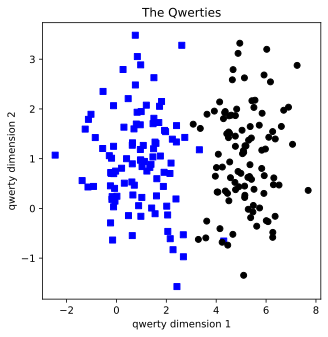

In [16]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels == 0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels == 1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The Qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')


In [17]:
ANNclassify = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid(),
)
ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [24]:
learningRate = 0.01
lossfunction = nn.BCELoss()
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr= learningRate)

In [25]:
numepochs = 1000
losses = torch.zeros(numepochs)
for epochi in range(numepochs):
  yHat = ANNclassify(data)

  loss = lossfunction(yHat, labels)
  losses[epochi] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Text(0, 0.5, 'Loss')

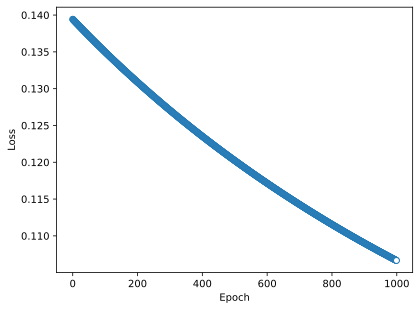

In [26]:
plt.plot(losses.detach(),'o',markerfacecolor= 'w',linewidth =.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')


In [28]:
predictions = ANNclassify(data)

predlabels = predictions>.5

misclassified = np.where(predlabels != labels)[0]

totalacc = 100-100*len(misclassified)/(2*nperclust)

print('Final accuracy:%g%%'%totalacc)

Final accuracy:98.5%


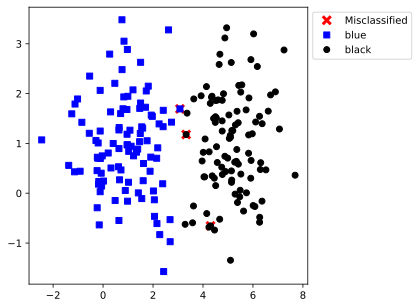

In [32]:
fig = plt.figure(figsize= (5,5))
plt.plot(data[misclassified,0],data[misclassified,1],'rx',markersize = 8,markeredgewidth= 3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0],data[np.where(predlabels)[0],1],'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
